In [73]:
import torch

import numpy as np
import matplotlib.pyplot as plt
from torch.nn import Linear, MSELoss, functional as F
%matplotlib inline

In [74]:
import torch.nn as nn

In [75]:
# Test GPU support
print(f'torch.cuda.is_available(): {torch.cuda.is_available()}')
cuda_current_device = torch.cuda.current_device()
print(f'torch.cuda.current_device(): {cuda_current_device}')
print(f'torch.cuda.get_device_name({cuda_current_device}): {torch.cuda.get_device_name(cuda_current_device)}')
print(f'torch.cuda.memory_allocated(): {torch.cuda.memory_allocated()}') # 0 at the begining when the kernel has started.

torch.cuda.is_available(): True
torch.cuda.current_device(): 0
torch.cuda.get_device_name(0): NVIDIA GeForce GTX 1080 Ti
torch.cuda.memory_allocated(): 27849216


In [76]:
number_datapoints = 300000
x_from = -20
x_to = 20

In [77]:
# generate data
X = torch.linspace(x_from, x_to, steps=number_datapoints).cuda()

In [78]:
X = X.reshape(-1, 1)

In [79]:
X.device

device(type='cuda', index=0)

In [80]:
X

tensor([[-20.0000],
        [-19.9999],
        [-19.9997],
        ...,
        [ 19.9997],
        [ 19.9999],
        [ 20.0000]], device='cuda:0')

In [81]:
torch.cuda.memory_allocated()

29049344

In [82]:
def y_fun(x):
    return 5 * x + 18

In [83]:
y = y_fun(X)

In [84]:
torch.manual_seed(100)
e = torch.randint(-3, 3, (number_datapoints, 1), dtype=torch.float).cuda()
y_noise =  y + e

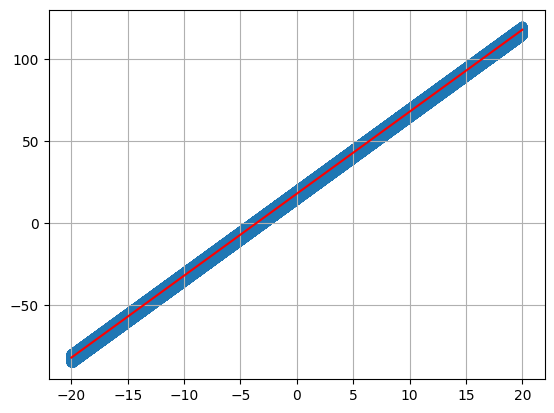

In [85]:
plt.scatter(X.cpu().numpy(), y_noise.cpu().numpy())
plt.plot(X.cpu().numpy(), y.cpu().numpy(), 'r')
plt.grid()

In [86]:
class NN(nn.Module):
    def __init__(self, h1=10):
        super().__init__()
        self.fc1 = nn.Linear(1, h1)    # input layer
        self.out = nn.Linear(h1, 1)   # output layer
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.out(x)
        return x

In [87]:
torch.manual_seed(44)
model = NN().cuda()

In [88]:
criterion = nn.MSELoss()

In [89]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [90]:
epochs = 520


In [91]:
losses = []

In [92]:
import time
start = time.time()
for epoch in range(epochs):
    epoch = epoch + 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y_noise)
    losses.append(loss.cpu())
    if epoch%10 == 0:
        print(f'epoch {epoch} loss {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
end = time.time() - start
print(f'total time {end}')

epoch 10 loss 2266.030517578125
epoch 20 loss 1466.918212890625
epoch 30 loss 773.9465942382812
epoch 40 loss 322.53363037109375
epoch 50 loss 169.84410095214844
epoch 60 loss 160.65455627441406
epoch 70 loss 140.77317810058594
epoch 80 loss 117.00602722167969
epoch 90 loss 102.91357421875
epoch 100 loss 90.48712158203125
epoch 110 loss 78.75865936279297
epoch 120 loss 68.4741439819336
epoch 130 loss 59.19373321533203
epoch 140 loss 50.83162307739258
epoch 150 loss 43.375911712646484
epoch 160 loss 36.759300231933594
epoch 170 loss 30.94024658203125
epoch 180 loss 25.87323570251465
epoch 190 loss 21.508832931518555
epoch 200 loss 17.794666290283203
epoch 210 loss 14.674333572387695
epoch 220 loss 12.088691711425781
epoch 230 loss 9.976863861083984
epoch 240 loss 8.277730941772461
epoch 250 loss 6.93161153793335
epoch 260 loss 5.881824016571045
epoch 270 loss 5.076085090637207
epoch 280 loss 4.467471122741699
epoch 290 loss 4.015022277832031
epoch 300 loss 3.6839263439178467
epoch 310 l

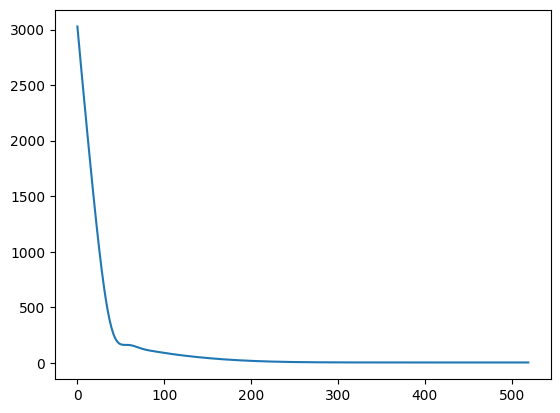

In [93]:
with torch.no_grad():
    plt.plot(range(epochs), losses)

In [94]:
with torch.no_grad():
    y_val = model.forward(X)

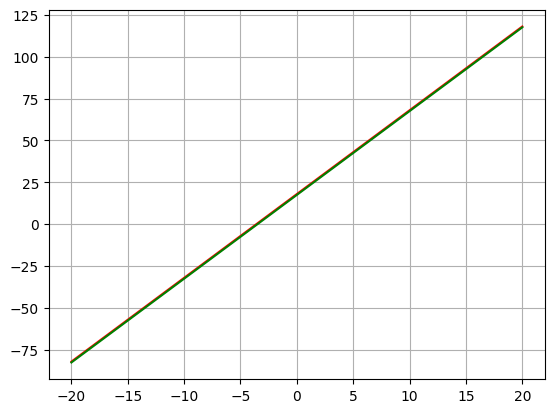

In [95]:
#plt.scatter(X.numpy(), y_noise.numpy())
plt.plot(X.cpu().numpy(), y.cpu().numpy(), 'r')
plt.plot(X.cpu().numpy(), y_val.cpu().numpy(), 'g')
plt.grid()

In [96]:
# Fast dirty test for unseen X here
# You'll see that the predictions are not that bad given the model has been trained on the data + noise
# The point is to compare the difference between training the model on GPU as opposed to training it on CPU


x_new = 25.0
with torch.no_grad():
    y_actual = model.forward(torch.tensor([[x_new]]).cuda())

print(f'For unseen x: {x_new} not in the [{x_from}, {x_to}] interval')
print(f'Expected: {y_fun(x_new)}, Predicted: {y_actual.item()}')

For unseen x: 25.0 not in the [-20, 20] interval
Expected: 143.0, Predicted: 142.48403930664062
